![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [7]:
data = pd.read_csv('BBDD_Hospitalizacion.csv', sep=';', decimal=',', encoding='latin-1')
data.shape

(568, 20)

In [8]:
data.loc[data.isna().any(axis=1)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3,0
26,75,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0
31,63,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0,0
76,57,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0,0
92,58,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
99,70,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0
100,74,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0,0
103,60,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
106,65,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0
109,61,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0,0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [9]:
data.drop([9,76,92,103,121,565,566,567], axis=0, inplace=True) # se eliminan los registros que tienen valores vacios que no pueden ser reemplazados

In [10]:
data.loc[data['ENF. CRONICA PULMONAR OBSTRUCTIVA'] == 'SI, EPOC', "ENF. CRONICA PULMONAR OBSTRUCTIVA"] = "SI" # correccion de valores
data.loc[data['ENF. CRONICA PULMONAR OBSTRUCTIVA'] == 'SI, ASMA', "ENF. CRONICA PULMONAR OBSTRUCTIVA"] = "SI"

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [11]:
data['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
NO    534
SI     23
Name: count, dtype: int64

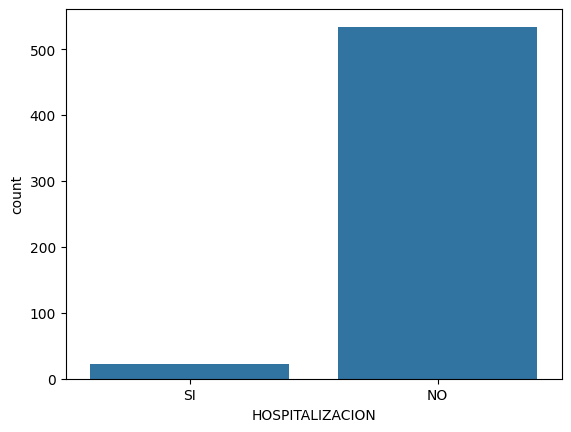

In [12]:
sns.countplot(x='HOSPITALIZACION', data=data)
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [13]:
data.drop(data[data['EDAD'] > 120].index, inplace=True) # se eliminan los registros con edad mayor a 120 años (outliers)

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [14]:
# Variables dummy

data = pd.concat([data, pd.get_dummies(data['TIPO DE CULTIVO'],prefix = str('TIPO DE CULTIVO'),prefix_sep='_',dtype=int)],axis = 1)
data = pd.concat([data, pd.get_dummies(data['AGENTE AISLADO'],prefix = str('AGENTE AISLADO'),prefix_sep='_',dtype=int)],axis = 1)
data = pd.concat([data, pd.get_dummies(data['PATRON DE RESISTENCIA'],prefix = str('PATRON DE RESISTENCIA'),prefix_sep='_',dtype=int)],axis = 1)

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [15]:
data.drop(['DIAS HOSPITALIZACION MQ'], axis=1, inplace=True)
data.drop(['DIAS HOSPITALIZACIÓN UPC'], axis=1, inplace=True)

In [16]:
data['AGENTE AISLADO'].fillna('NO', inplace=True) # se reepmplaza el valor por NO ya que no se realizó cultivo
data['HOSPITALIZACION'].fillna('NO', inplace=True) # se reemplaza el valor por NO ya que no fué hospitalizado

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [17]:
data.replace({"NO": 0, "SI": 1}, inplace=True) # se reemplazan valores de SI y NO por valores binarios
data.loc[data['TIPO DE CULTIVO'] == 0, "TIPO DE CULTIVO"] = "NO" # correccion de valores
data.loc[data['AGENTE AISLADO'] == 0, "AGENTE AISLADO"] = "NO" # correccion de valores
data.loc[data['PATRON DE RESISTENCIA'] == 0, "PATRON DE RESISTENCIA"] = "NO" # correccion de valores

In [18]:
data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('int')

In [19]:
data = data.drop(data.columns[[6,10,14,15,16]], axis='columns')
data.reindex()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,0,0,4.0,0,1,12,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,56,0,0,7.7,0,1,12,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,57,0,0,29.0,1,1,24,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,56,0,0,7.0,0,1,12,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,55,0,0,29.0,1,1,24,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57,0,0,4.8,0,0,12,0,0,0,...,1,0,0,1,0,0,0,1,0,0
561,75,0,0,75.0,0,1,12,0,0,0,...,1,0,0,1,0,0,0,1,0,0
562,78,0,0,9.3,0,1,12,0,0,0,...,1,0,0,1,0,0,0,1,0,0
563,67,0,0,6.0,0,1,12,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 564
Data columns (total 25 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   EDAD                                                                                                   558 non-null    int64  
 1   DIABETES                                                                                               558 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                                             558 non-null    int64  
 3   PSA                                                                                                    558 non-null    float64
 4   BIOPSIAS PREVIAS                                                                                       

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

## Prueba de Seleccion con informacion mutua

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [22]:
data = data[data.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,18,19,20,21,22,23,24,12]]]
data.reindex()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",HOSPITALIZACION
0,53,0,0,4.0,0,1,12,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1,56,0,0,7.7,0,1,12,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,57,0,0,29.0,1,1,24,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,56,0,0,7.0,0,1,12,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,55,0,0,29.0,1,1,24,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57,0,0,4.8,0,0,12,0,0,0,...,1,0,1,0,0,0,1,0,0,0
561,75,0,0,75.0,0,1,12,0,0,0,...,1,0,1,0,0,0,1,0,0,0
562,78,0,0,9.3,0,1,12,0,0,0,...,1,0,1,0,0,0,1,0,0,0
563,67,0,0,6.0,0,1,12,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [23]:
X = data.iloc[:, :-1].values # Variables independientes
y = data.iloc[:, -1].values # Variable dependiente (la que queremos predecir)


In [24]:
sel = SelectKBest(mutual_info_classif, k=18)
data_redu = sel.fit_transform(X, y)
data_redu.shape

(558, 18)

In [25]:
columnas = sel.get_support(indices=True)
columnas_sel = data.iloc[:,columnas].columns.tolist()
columnas_sel

['EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
 'FIEBRE',
 'ITU',
 'TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO',
 'TIPO DE CULTIVO_NO',
 'TIPO DE CULTIVO_UROCULTIVO',
 'AGENTE AISLADO_NO',
 'AGENTE AISLADO_PSEUDOMONAS AERUGINOSA',
 'PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
 'PATRON DE RESISTENCIA_MULTI SENSIBLE',
 'PATRON DE RESISTENCIA_NO',
 'PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA']

## -----------------------------------------------------------

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [26]:
#data.info()

In [27]:
data = data.drop(data.columns[[2,4,7,8,]], axis='columns')
data.reindex()

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO_HEMOCULTIVO,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",HOSPITALIZACION
0,53,0,4.0,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
1,56,0,7.7,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
2,57,0,29.0,1,24,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,56,0,7.0,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
4,55,0,29.0,1,24,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57,0,4.8,0,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
561,75,0,75.0,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
562,78,0,9.3,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
563,67,0,6.0,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


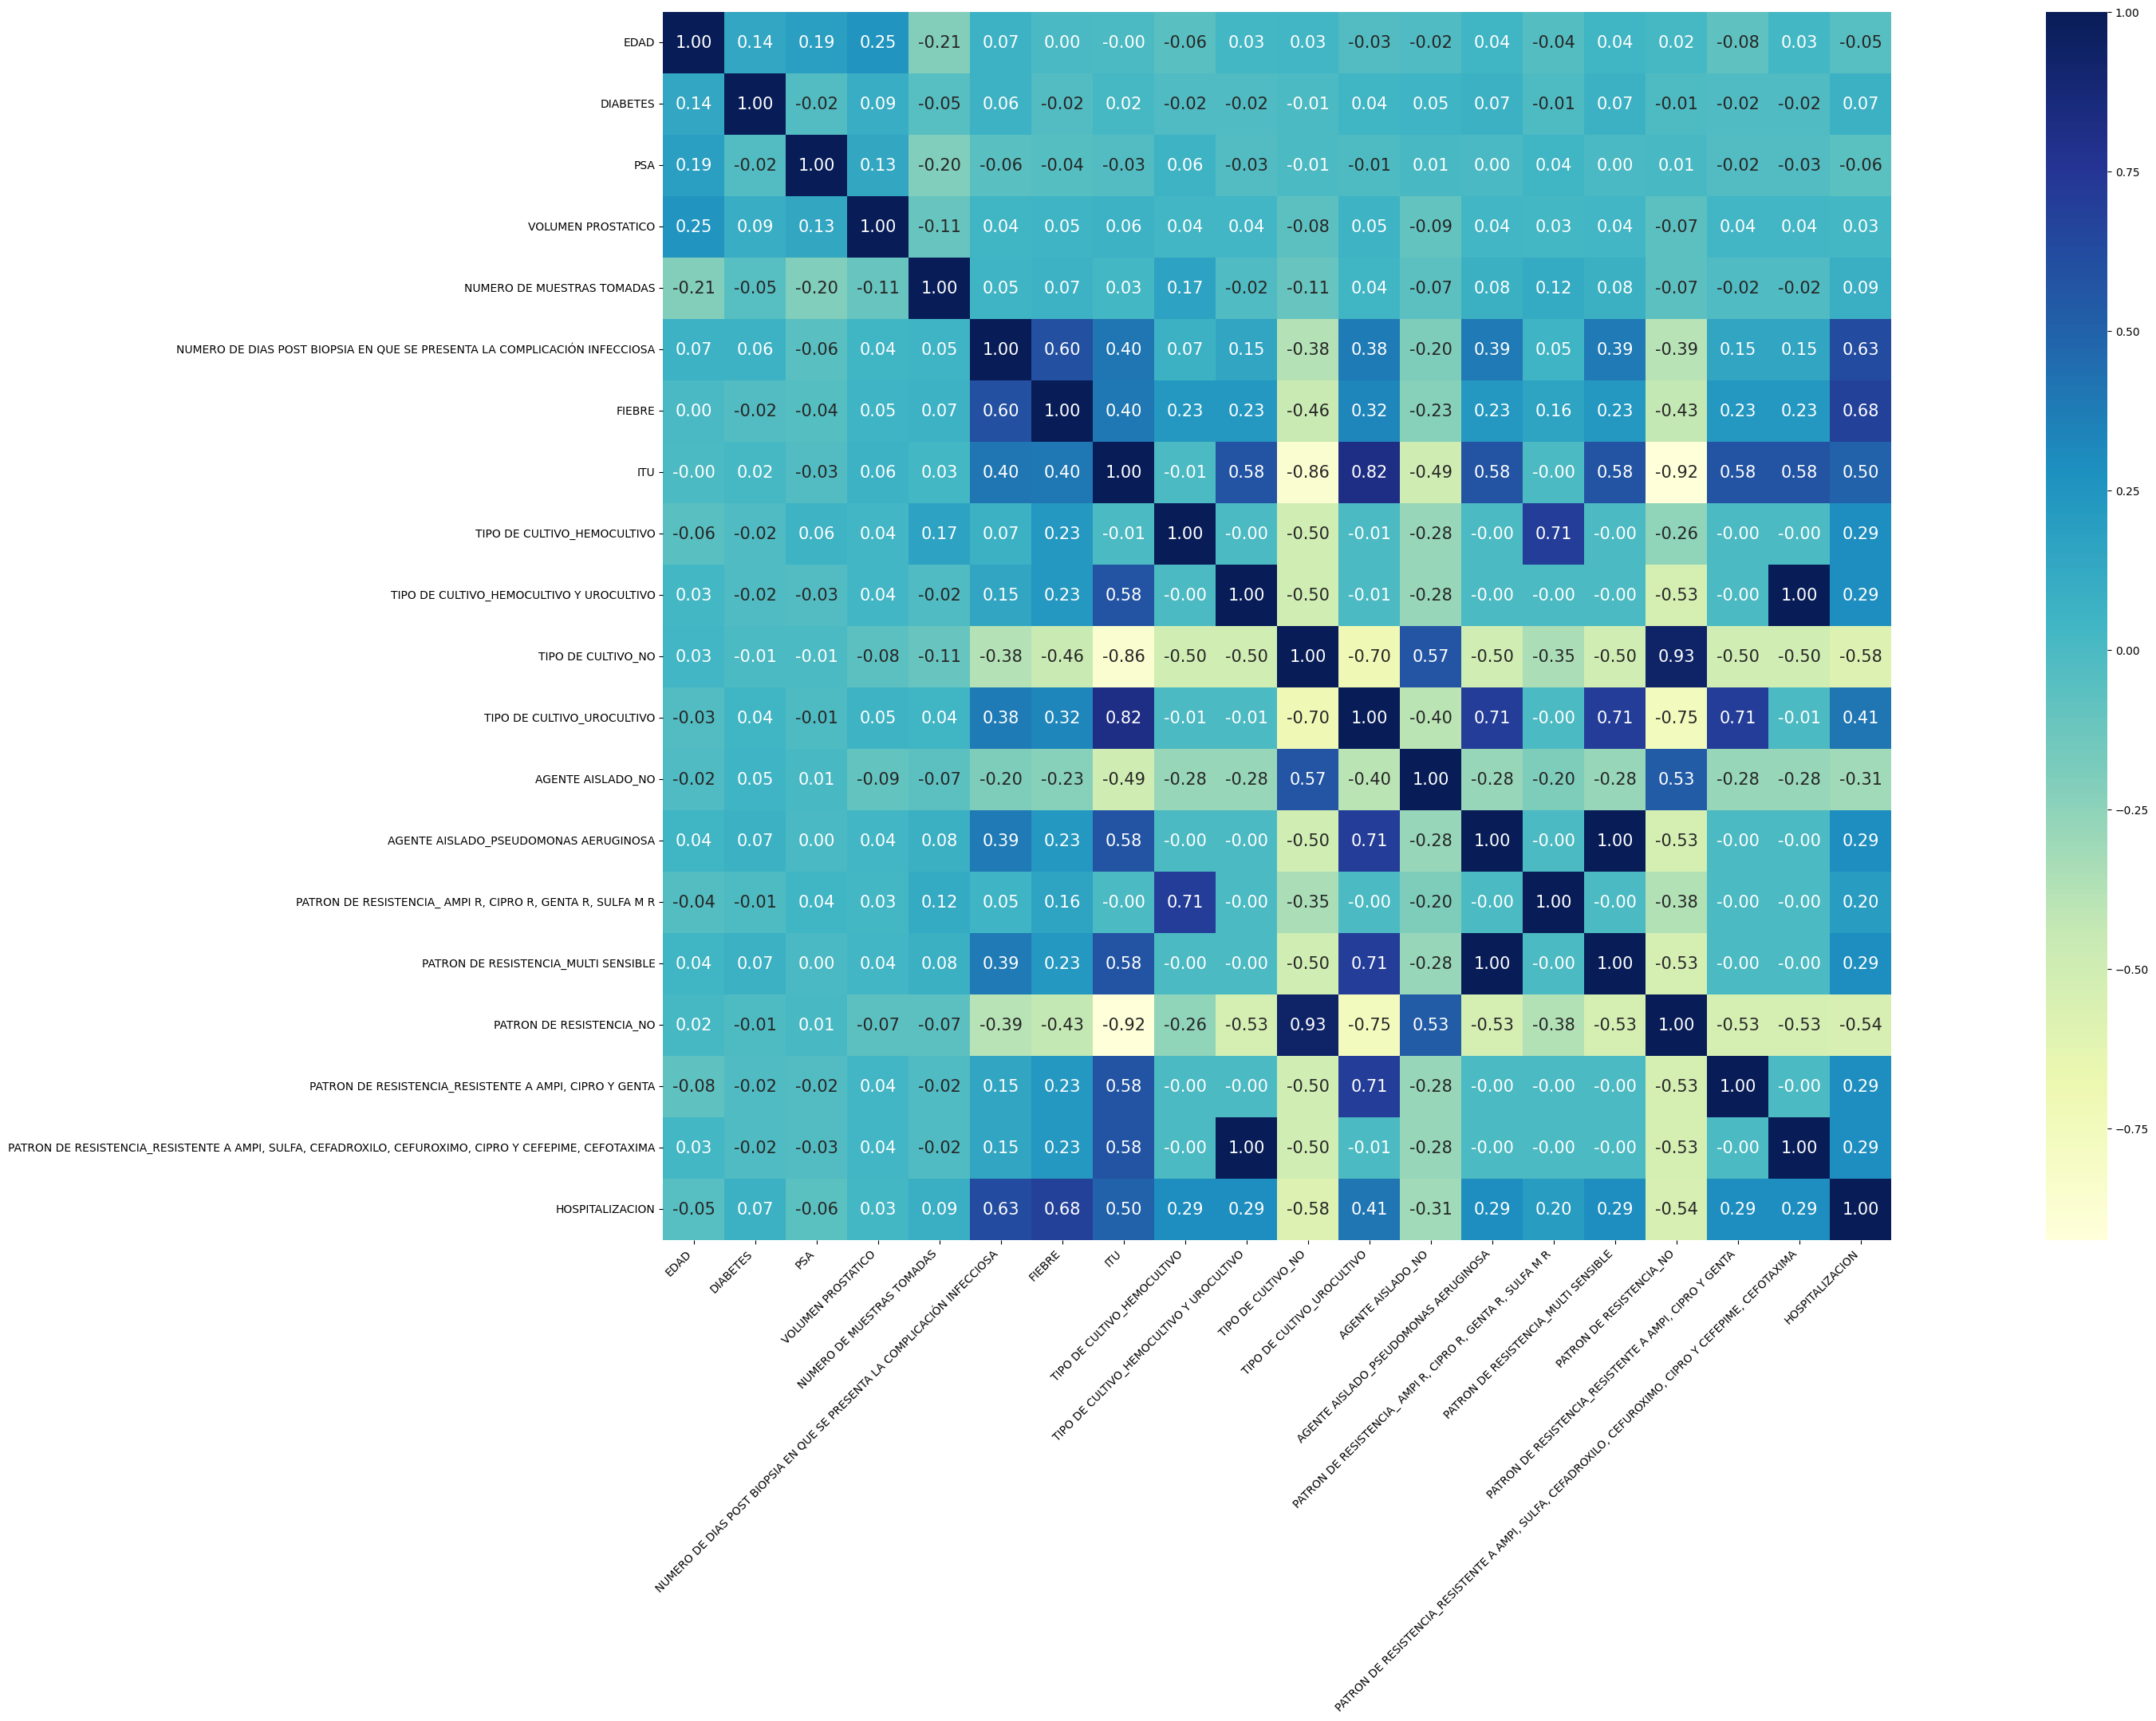

In [28]:
fig = plt.figure(figsize= (50,20))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [29]:
data.to_csv('Hospitalizacion.csv')

In [30]:
#data_prueba.to_excel('Hospitalizacion.xlsx', index=False)

In [31]:
#data = data[data.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,18,19,20,21,22,23,24,12]]]
#data.reindex()

In [32]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#X = data.iloc[:, :-1].values # Variables independientes
#y = data.iloc[:, -1].values # Variable dependiente (la que queremos predecir)
#sel = SelectKBest(mutual_info_classif, k=18)
#data_redu = sel.fit_transform(X, y)
#data_redu.shape

#columnas = sel.get_support(indices=True)
#columnas_sel = data.iloc[:,columnas].columns.tolist()
#columnas_sel